# OUTLIER
Data beyond the range.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('loan_test.csv')
dataset.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              356 non-null    object 
 1   Married             367 non-null    object 
 2   Dependents          357 non-null    object 
 3   Education           367 non-null    object 
 4   Self_Employed       344 non-null    object 
 5   Applicant_Income    367 non-null    int64  
 6   Coapplicant_Income  367 non-null    int64  
 7   Loan_Amount         367 non-null    int64  
 8   Term                361 non-null    float64
 9   Credit_History      338 non-null    float64
 10  Area                367 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 31.7+ KB


In [5]:
dataset.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,3.670000e+02,3.670000e+02,3.670000e+02,361.000000,338.000000
mean,4.805599e+05,1.569578e+05,1.342779e+07,342.537396,0.825444
std,4.910685e+05,2.334232e+05,6.296143e+06,65.156643,0.380150
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,0.000000
25%,2.864000e+05,0.000000e+00,1.000000e+07,360.000000,1.000000
50%,3.786000e+05,1.025000e+05,1.250000e+07,360.000000,1.000000
75%,5.060000e+05,2.430500e+05,1.575000e+07,360.000000,1.000000
max,7.252900e+06,2.400000e+06,5.500000e+07,480.000000,1.000000


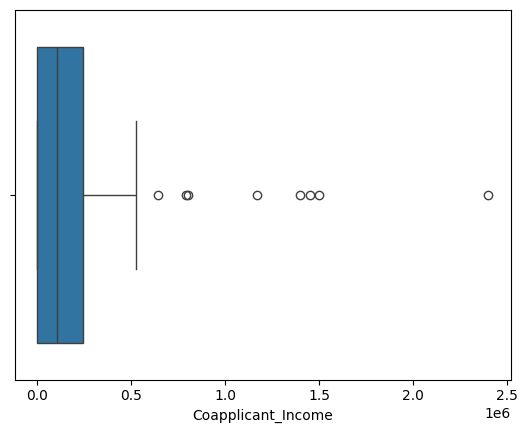

In [6]:
sns.boxplot(x='Coapplicant_Income',data=dataset)
plt.show()

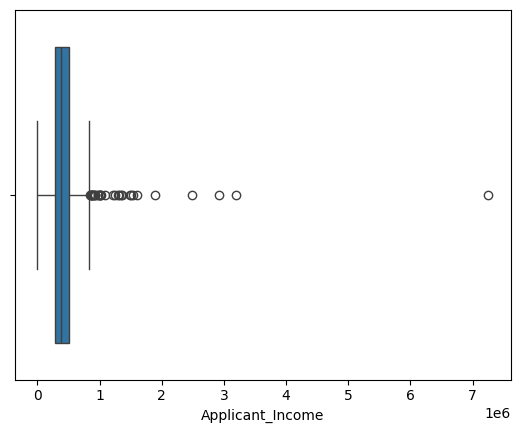

In [7]:
sns.boxplot(x='Applicant_Income',data=dataset)
plt.show()

## Outlier removal using IOR

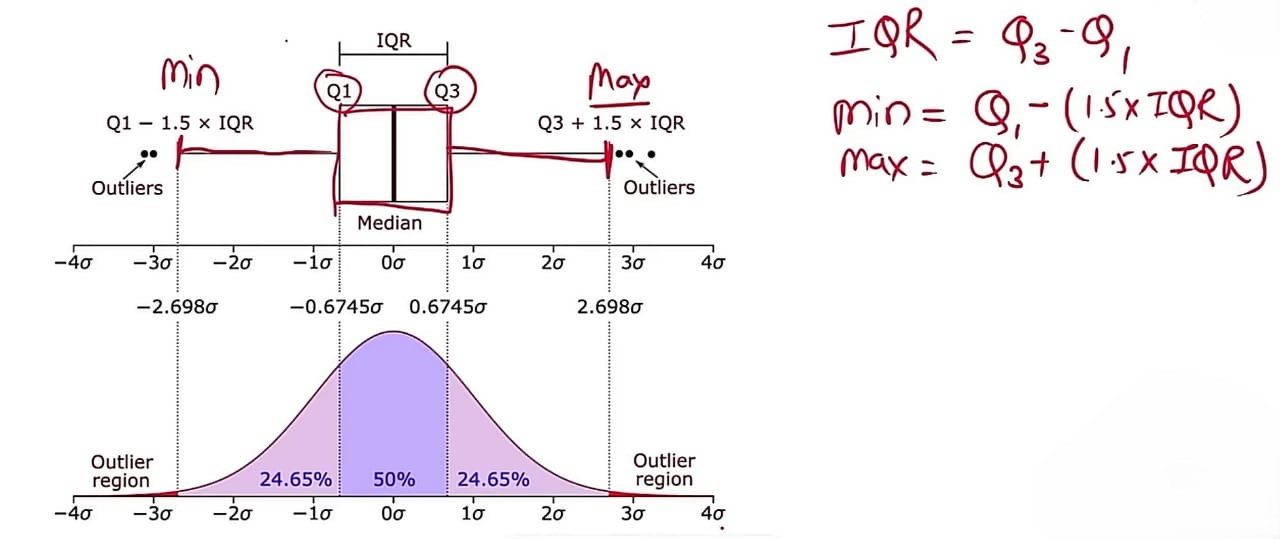

In [8]:
dataset.shape

(367, 11)

In [12]:
# finding first and third quartile range (Q1 & Q3)

In [13]:
Q1 = dataset['Coapplicant_Income'].quantile(0.25)
Q3 = dataset['Coapplicant_Income'].quantile(0.75)
Q1,Q3

(0.0, 243050.0)

In [15]:
IQR = Q3-Q1
IQR

243050.0

In [19]:
min_range= Q1-(1.5*IQR)
min_range

-364575.0

In [20]:
max_range= Q3+(1.5*IQR)
max_range

607625.0

In [21]:
# we get max_range is in positive so we can also se in plot the outlier also present after the range of 607...

### Removing outlier from original data

In [22]:
dataset.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban


In [25]:
new_dataset = dataset[dataset['Coapplicant_Income']<=max_range]
new_dataset

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,400900,177700,11300000,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,415800,70900,11500000,360.0,1.0,Urban
364,Male,No,0,Graduate,No,325000,199300,12600000,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,500000,239300,15800000,360.0,1.0,Rural


In [29]:
new_dataset.shape      # 8 rows get removed which contain outliers

(359, 11)

In [30]:
367-359

8

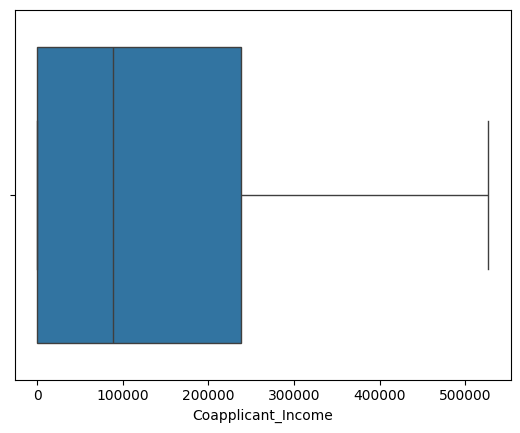

In [31]:
# we can see our outliers get removed by plotting graph
sns.boxplot(x='Coapplicant_Income',data=new_dataset)
plt.show()


### You can see clearly there is no outliers present now